In [1]:
train = pd.read_json('./raw_data/train.json')
val = pd.read_json('./raw_data/val.json')

In [71]:
genre = pd.read_json('./raw_data/genre_gn_all.json',)

ValueError: If using all scalar values, you must pass an index

In [69]:
song_meta = pd.read_json('./raw_data/song_meta.json')

In [70]:
song_meta

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987


In [14]:
val[val['songs'].apply(len) == 1]

16

In [2]:
df = pd.concat([train,val])

In [3]:
df = df[['id','songs']]

In [4]:
# val에만 노래가 없는 플레이리스트가 있음
df = df[df['songs'].apply(len) != 0]

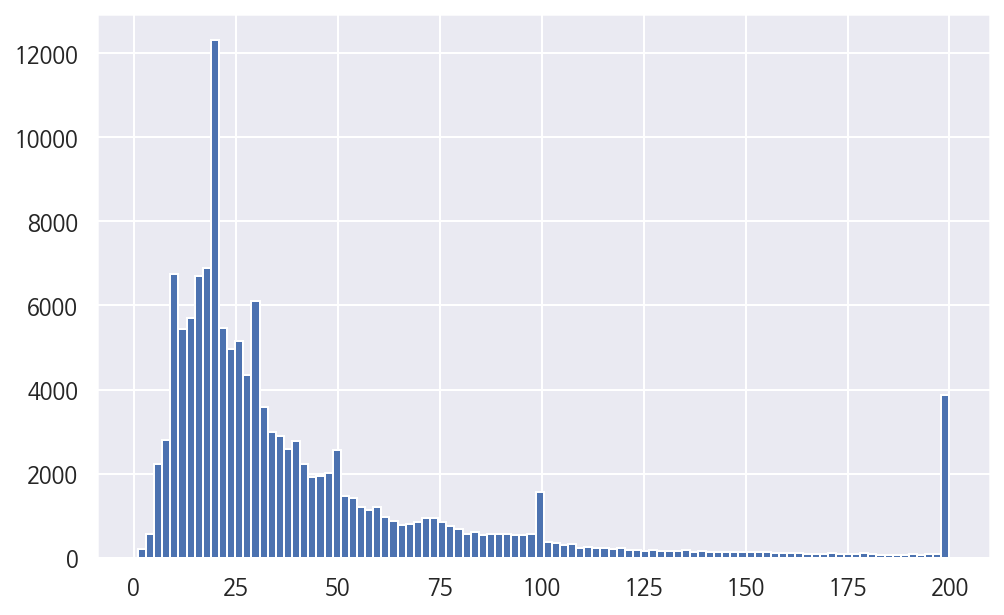

In [5]:
plt.hist(df['songs'].apply(len),bins=100)
plt.show()

In [6]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np

import random
import sys
import io
import re

Using TensorFlow backend.


In [7]:
df

,id,songs
0,61281,"[525514, 129701, 383374, 562083, 297861, 13954..."
1,10532,"[432406, 675945, 497066, 120377, 389529, 24427..."
2,76951,"[83116, 276692, 166267, 186301, 354465, 256598..."
3,147456,"[394031, 195524, 540149, 287984, 440773, 10033..."
4,27616,"[159327, 553610, 5130, 645103, 294435, 100657,..."
...,...,...
23010,101722,"[75842, 26083, 244183, 684715, 500593, 508608,..."
23011,122127,"[450275, 487671, 561031, 663944, 628672, 59121..."
23012,77438,"[625875, 464051, 11657, 236393, 358186, 213435..."
23013,36231,"[161094, 665833, 688145, 432735, 439938, 12665..."


In [19]:
val[val['songs'].apply(len) == 1]

,tags,id,plylst_title,songs,like_cnt,updt_date
829,[],118562,,[707293],13,2016-06-29 18:44:23.000
1235,[],60825,,[158207],95,2014-12-15 18:19:57.000
2519,[],93893,,[590860],0,2018-02-26 10:11:20.000
2880,[],113370,,[404812],76,2008-11-27 16:13:26.000
4353,[],109786,,[124539],1,2019-06-12 10:10:24.000
5417,[],31314,,[382530],0,2019-06-12 10:10:24.000
5987,[],27746,,[268414],12,2016-11-07 15:59:29.000
7051,[],95216,,[23640],72,2013-04-17 10:55:23.000
9487,[여름],50781,,[532375],77,2014-07-31 10:07:53.000
10315,[],13972,,[598137],2,2014-12-04 00:08:30.000


In [15]:
chars = list(set(text))
print('total chars:', len(text))

total chars: 45146


In [16]:
char_indices = dict(((c,i) for i,c in enumerate(chars)))
indices_char = dict(((i,c) for i,c in enumerate(chars)))

In [17]:
df['songs'].iloc[:3]

0    [525514, 129701, 383374, 562083, 297861, 13954...
1    [432406, 675945, 497066, 120377, 389529, 24427...
2    [83116, 276692, 166267, 186301, 354465, 256598...
Name: songs, dtype: object

In [8]:
encoding = np.eye(10)

In [9]:
encoding

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [22]:
def levenshtein(s1, s2, cost=None, debug=False):
    if len(s1) < len(s2):
        return levenshtein(s2, s1, debug=debug)

    if len(s2) == 0:
        return len(s1)

    if cost is None:
        cost = {}

    # changed
    def substitution_cost(c1, c2):
        if c1 == c2:
            return 0
        return cost.get((c1, c2), 1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            # Changed
            substitutions = previous_row[j] + substitution_cost(c1, c2)
            current_row.append(min(insertions, deletions, substitutions))

        if debug:
            print(current_row[1:])

        previous_row = current_row

    return previous_row[-1]

In [26]:
from tqdm import tqdm

In [34]:
from editdistance import eval as edit_distance

In [48]:
from collections import deque

In [49]:
dq = deque(list(np.zeros(len(train.songs.values))))

In [62]:
def test():
    D = []
    values = train.songs.values
    for value_1 in values[:1]:
        d = []
        for value_2 in values:        
            d.append(edit_distance(value_1, value_2))
        D.append(d)

In [56]:
values = train.songs.values
D = [
    [edit_distance(value_1, value_2) for value_2 in values]
    for value_1 in values[:5]
]

In [60]:
from cProfile import Profile
from pstats import Stats

In [64]:
profile = Profile()

In [65]:
profile.runcall(test)

In [67]:
stats = Stats(profile)
stats.strip_dirs()
stats.sort_stats('cumulative')
stats.print_stats()

         230173 function calls in 1.782 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.040    0.040    1.782    1.782 <ipython-input-62-6022aca7cc45>:1(test)
   115071    1.733    0.000    1.733    0.000 {built-in method editdistance.bycython.eval}
   115072    0.008    0.000    0.008    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 generic.py:5162(__getattr__)
        1    0.000    0.000    0.000    0.000 base.py:4297(_can_hold_identifiers_and_holds_name)
        1    0.000    0.000    0.000    0.000 frame.py:2949(__getitem__)
        1    0.000    0.000    0.000    0.000 base.py:1826(is_object)
        1    0.000    0.000    0.000    0.000 common.py:225(is_object_dtype)
        1    0.000    0.000    0.000    0.000 series.py:517(values)
        1    0.000    0.000    0.000    0.000 common.py:1886(_is_dtype_type)
        2    0.000    0.000    0.000    0.000 base.

In [32]:
!pip install editdistance

     |████████████████████████████████| 43 kB 331 kB/s eta 0:00:011
ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/Users/yoohowon/opt/anaconda3/envs/fastcampus/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/Users/yoohowon/opt/anaconda3/envs/fastcampus/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/yoohowon/opt/anaconda3/envs/fastcampus/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/Users/yoohowon/opt/anaconda3/envs/fastcampus/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)


In [23]:
train['songs'].iloc[0]

[525514,
 129701,
 383374,
 562083,
 297861,
 139541,
 351214,
 650298,
 531057,
 205238,
 706183,
 127099,
 660493,
 461973,
 121455,
 72552,
 223955,
 324992,
 50104]